In [2]:
'''
7/15/2024
- Experiment with the data to get a better fit
- Goal is 3x2 plot with blue line (data) and red line (best fit) that are very similar (experiment to make that happen)
- Prepare for 8 minute presentation and create slides:
  1. Exoplanet background (3 min)
  2. Methods (SR) (2 min)
  3. Results and conclusion (3 min)

  Focus on 1 and 2

  ***This version is a copy of the first, but with:
  - More unary operators
  - Altered maxdepth and maxsize
  - More iterations
  

'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 10000

In [4]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))

################################################################################################
# This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
################################################################################################


In [5]:
len(T_mock_arr), T_mock_arr

(10000, array([4000, 4000, 4000, ..., 3000, 4000,  750]))

In [6]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [7]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [8]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    # # Add Asymptotic behavior
    # large_P_val = 140000 # units of Gpa 
    # T_vals = [750, 1000, 1500, 2000, 3000, 4000] # units of K
    # for T in T_vals:
    #     T_arr = np.append(T_arr, T)
    #     P_arr = np.append(P_arr, large_P_val)
    #     XH2_arr = np.append(XH2_arr, 0.00)
    #     T_arr = np.append(T_arr, T)
    #     P_arr = np.append(P_arr, large_P_val)
    #     XH2_arr = np.append(XH2_arr, 1.00)

################################################################################################
################################################################################################
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

In [9]:
# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_arr

In [10]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=60,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
            "sin",
            "cos",
            "tan",
            "abs"
        ],
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [11]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.660e+04
Head worker occupation: 5.9%
Progress: 29 / 900 total iterations (3.222%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           9.989e+04  7.971e+00  y = abs(-134.4)
4           7.764e+04  1.260e-01  y = abs(-0.10626 * x₁)
5           7.563e+04  2.627e-02  y = (0.088126 * x₁) + -1.5088
6           7.521e+04  5.582e-03  y = (0.088126 * x₁) - log(x₁)
7           7.367e+04  2.071e-02  y = (0.088044 * x₁) - tan(tan(1.3608))
8           7.075e+04  4.034e-02  y = abs(x₁ * (0.1439 * (-0.6418 + x₀)))
10          4.670e+04  2.077e-01  y = abs(log(tan(x₀)) * (x₁ * 0.12285)) - -0.35846
12          3.392e+04  1.599e-01  y = abs(((x₁ * 0.13336) / tan(tan(x₀) + 0.31836)) + -186.2)
13          2.996e+04  1.242e-01  y = abs(abs((x₁ * -0.30924) / tan(tan(x₀) + 0.72852)) + -170.5...
                                  3)
16          2.838e+04  1.806

PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                           134.4547   
	1         1.382458e-01                                    x1 * 0.08775665   
	2         1.319900e-07                               cos(-1.4829271) * x1   
	3         2.939057e-01                            (0.011425437 * x1) / x0   
	4         6.680125e-03                       (0.011425437 * x1) / sin(x0)   
	5         4.378289e-01                      tan(log(x1) / 1.7642698) / x0   
	6         1.590312e-01                abs(tan(log(x1) / -5.2350435) / x0)   
	7         1.659437e-02           abs(tan(log(x1) / -5.2350435) / sin(x0))   
	8         3.042276e-01  abs((-0.05969969 * (x1 - 1243.185)) / (0.05503...   
	9         5.196335e-01  abs(tan(log(log(x1)) - 0.53755754) / (0.027295...   
	10        1.468906e-01  abs((tan(tan(log(log(x1)))) / -0.06778187) / (...   
	11        1.559113e-02  abs((tan(tan(log(log(x1)))) / 0.06955136) / (-...   
	12        2.952704e-01  abs((tan(tan(log(log(x1)))) / 0.024508994) / t...   
	13        3.507178e-01  abs((tan(tan(log(log(x1)))) / -0.017539067) / ...   
	14        7.126930e-01  abs((tan(tan(log(log(x1)))) / 0.02513953) / ta...   
	15        5.123555e-01  abs((tan(tan(log(log(x1)))) / -0.03341402) / (...   
	16        7.274342e-04  abs((tan(tan(log(log(x1)))) / -0.03341402) / (...   
	17  >>>>  7.313149e-01  abs(((tan(tan(log(log(x1)))) - 0.90073645) / 0...   
	18        9.985227e-02  abs(((tan(tan(log(log(x1)))) - abs(-0.6597966)...   
	
	           loss  complexity  
	0   99893.59000           1  
	1   75763.30000           3  
	2   75763.29000           4  
	3   56469.92600           5  
	4   56093.95700           6  
	5   36205.07000           7  
	6   30881.83000           8  
	7   30373.59400           9  
	8   22406.38500          10  
	9   13325.94000          11  
	10  11505.46200          12  
	11  11327.47000          13  
	12   8431.37900          14  
	13   5937.22900          15  
	14   2911.15400          16  
	15   1744.02220          17  
	16   1742.75400          18  
	17    838.74524          19  
	18    759.04020          20  
]

In [12]:
# Access the chosen best fit equation
model.equations_
eqn_num = 17

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_478445/2358587076.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = abs(((tan(tan(log(log(x1)))) - 0.90073645) / 0.029873155) / (tan(tan(x0) / cos(-0.9987563)) - -0.09776732))


In [13]:
 model.equations_.sympy_format[eqn_num]

Abs((33.4748706656528*tan(tan(log(log(x1)))) - 30.1520361675893)/(tan(1.84723914111221*tan(x0)) + 0.09776732))

In [14]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

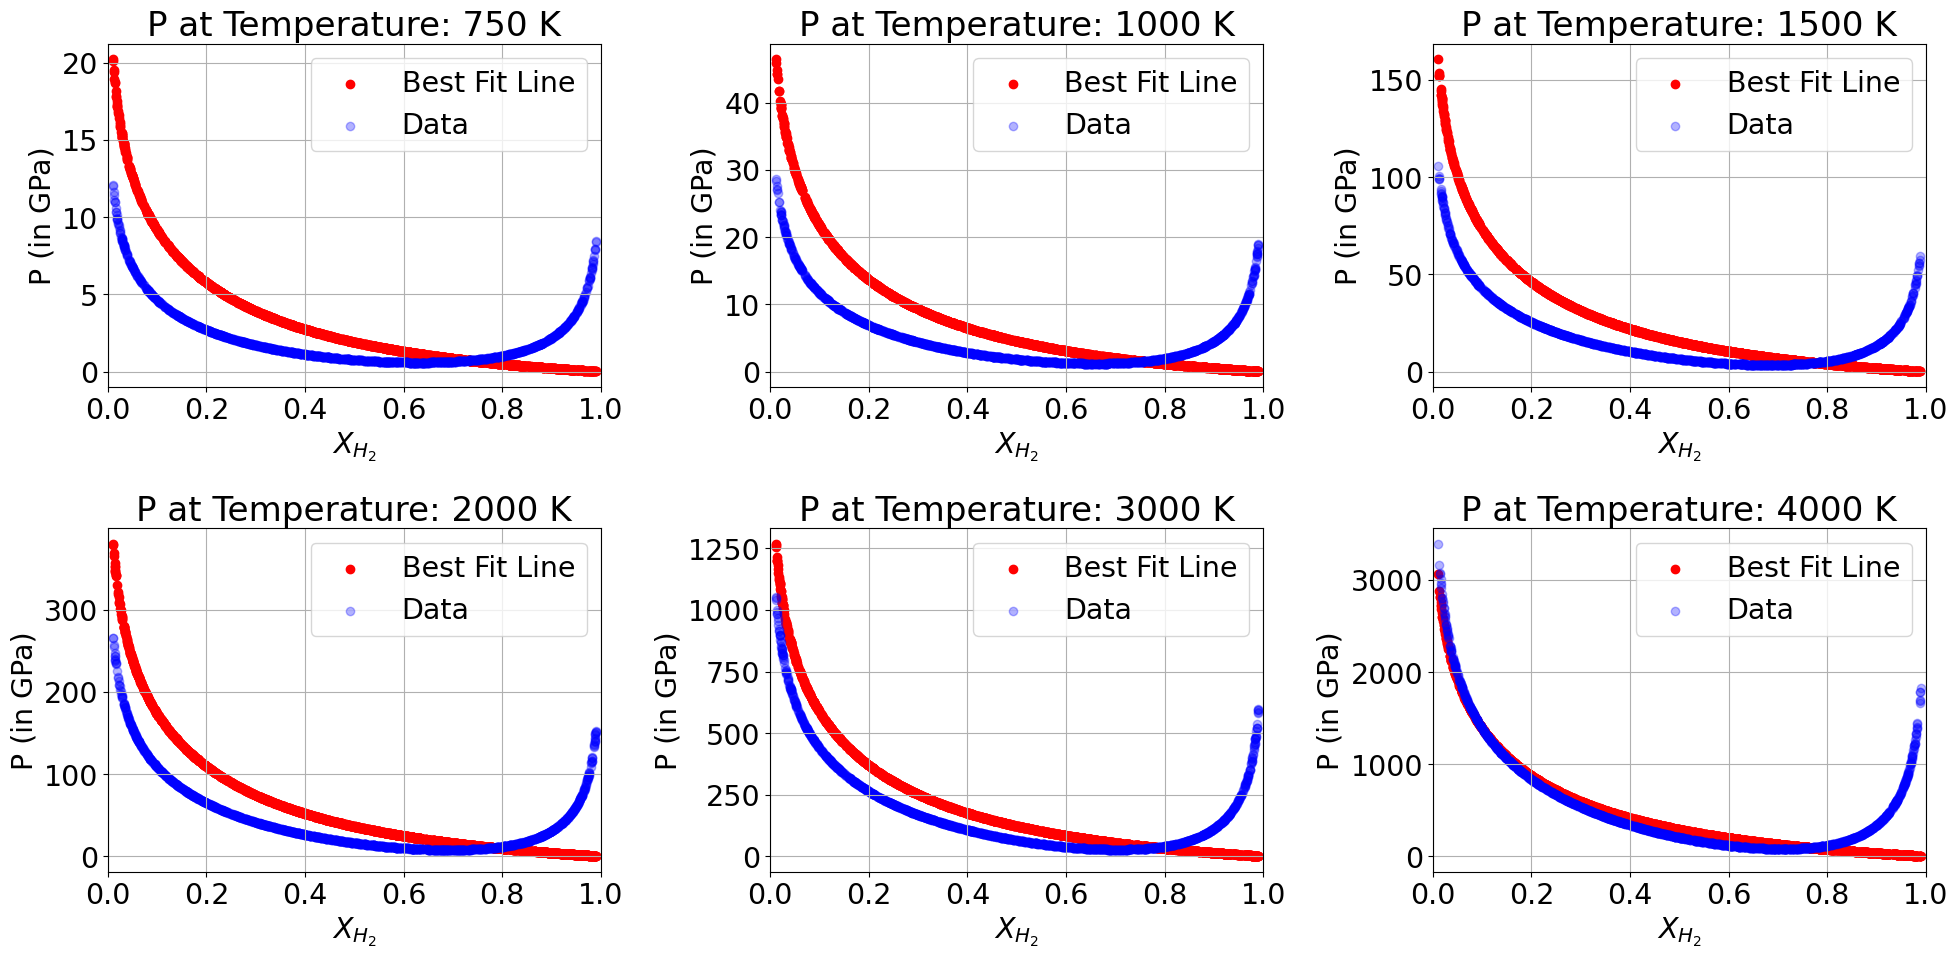

In [16]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]

# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20.5

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

     # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = ((x1 * ((x1 * np.log(x0)) * x1)) * -8.618606e-9) / (x0 - -0.8142004)
    # Select subplot
    ax = axes[i // 3, i % 3] 
      # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel(r'$X_{H_{2}}$')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

